In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [ ]:
import pandas as pd
fear_greed = pd.read_csv('/content/fear_greed_index.csv')
trades = pd.read_csv('/content/historical_data.csv', low_memory=False)
fear_greed.columns = fear_greed.columns.str.strip().str.lower()
trades.columns = trades.columns.str.strip().str.lower()
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
trades['date'] = pd.to_datetime(trades['timestamp'], unit='ms').dt.normalize()

In [12]:
trades.columns = trades.columns.str.strip().str.lower().str.replace(' ', '_')
trades = trades.dropna(subset=['closed_pnl', 'size_usd'])
trades['abs_size'] = trades['size_usd'].abs()

In [14]:
merged = trades.merge(
    fear_greed[['date', 'value', 'classification']],
    on='date',
    how='inner'
)

In [19]:
merged.columns = (
    merged.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)
sentiment_stats = (
    merged
    .groupby('classification')
    .agg({
        'closed_pnl': ['mean', 'sum'],
        'abs_size': 'mean'
    })
    .reset_index()
)
sentiment_stats.columns = [
    'sentiment',
    'avg_pnl',
    'total_pnl',
    'avg_volume'
]
merged.columns.tolist()

['account',
 'coin',
 'execution_price',
 'size_tokens',
 'size_usd',
 'side',
 'timestamp_ist',
 'start_position',
 'direction',
 'closed_pnl',
 'transaction_hash',
 'order_id',
 'crossed',
 'fee',
 'trade_id',
 'timestamp',
 'date',
 'abs_size',
 'value',
 'classification']

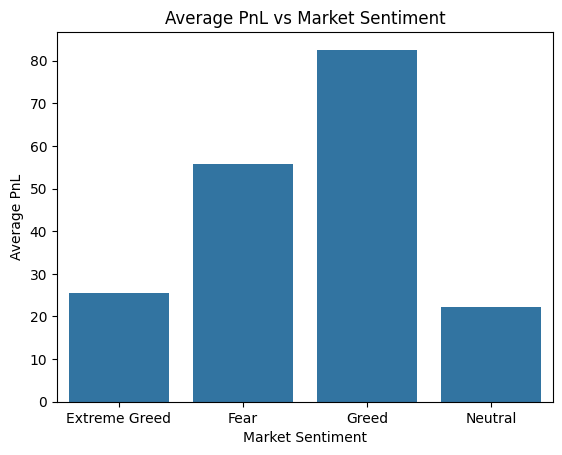

In [21]:
sns.barplot(x='sentiment', y='avg_pnl', data=sentiment_stats)
plt.title('Average PnL vs Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
import os
os.makedirs('/content/outputs', exist_ok=True)
plt.savefig('/content/outputs/pnl_vs_sentiment.png')
plt.show()

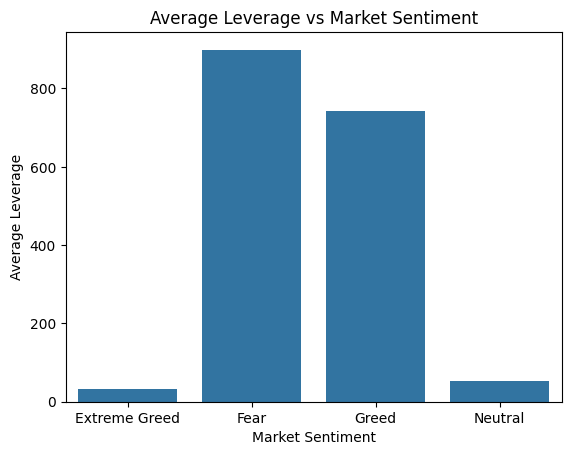

In [ ]:
# Example: Avg_Leverage = total_pnl / avg_volume (replace with your actual formula)
sentiment_stats['avg_leverage'] = sentiment_stats['total_pnl'] / sentiment_stats['avg_volume']
sns.barplot(x='sentiment', y='avg_leverage', data=sentiment_stats)
plt.title('Average Leverage vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Leverage')
plt.savefig('/content/outputs/leverage_vs_sentiment.png', bbox_inches='tight')
plt.show()

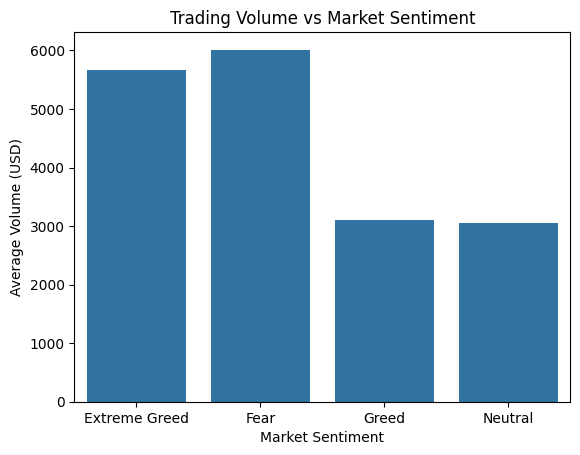

In [25]:
os.makedirs('/content/outputs', exist_ok=True)
sns.barplot(x='sentiment', y='avg_volume', data=sentiment_stats)
plt.title('Trading Volume vs Market Sentiment')
plt.ylabel('Average Volume (USD)')
plt.xlabel('Market Sentiment')
plt.savefig('/content/outputs/volume_vs_sentiment.png')
plt.show()

In [ ]:
os.makedirs('/content/csv_files', exist_ok=True)
merged.to_csv('/content/csv_files/sentiment_merged.csv', index=False)
print("Merged CSV saved successfully at /content/csv_files/sentiment_merged.csv")

Merged CSV saved successfully at /content/csv_files/sentiment_merged.csv
